# Satellite Trajectory Predictor

This notebook demonstrates the use of the satellite trajectory prediction system.
It reads satellite data, creates Satellite objects, predicts trajectories, and visualizes them.


In [1]:
# Import necessary libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
import os

# Add the current directory to Python path to import our modules
current_dir = os.path.dirname(os.path.abspath(''))
if current_dir not in sys.path:
    sys.path.append(current_dir)

# Import our custom modules
from satellite import Satellite
from trajectory_plotter import TrajectoryPlotter
from orbital_mechanics import (
    calculate_orbital_elements,
    predict_future_positions,
    generate_position_generator,
    calculate_orbital_period,
    calculate_velocity
)
from data_handler import (
    read_satellite_data_from_file,
    create_satellite_objects,
    write_satellite_summary_to_file
)

print("All modules imported successfully!")
print(f"Python version: {sys.version}")
print(f"Working directory: {os.getcwd()}")


All modules imported successfully!
Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]
Working directory: /Users/RashikaSN/Rashika/01 Education/01 Education/03 Stevens/02 Courses/01 Sem 4 - Fall 2025/AAI 551 C Python/Project/Python Project Cursor/satellite_trajectory_predictor


## Step 1: Read Satellite Data from File

We'll read satellite data from a CSV file. This demonstrates data I/O operations.


In [2]:
# Read satellite data from CSV file with exception handling
try:
    data_file = 'data/sample_satellites.csv'
    satellites_data = read_satellite_data_from_file(data_file)
    print(f"Successfully loaded {len(satellites_data)} satellites from {data_file}")
    
    # Display first satellite data
    if satellites_data:
        print(f"\nFirst satellite data:")
        for key, value in satellites_data[0].items():
            print(f"  {key}: {value}")
            
except FileNotFoundError as e:
    print(f"Error: File not found - {e}")
    print("Please ensure the data file exists in the correct location.")
except ValueError as e:
    print(f"Error: Invalid data format - {e}")
except Exception as e:
    print(f"Unexpected error: {type(e).__name__}: {e}")


Successfully loaded 5 satellites from data/sample_satellites.csv

First satellite data:
  name: ISS
  id: 25544
  inclination: 51.6444
  eccentricity: 0.0001647
  semi_major_axis: 6778.14
  mean_anomaly: 45.2
  epoch: 2024-01-01 00:00:00


## Step 2: Create Satellite Objects

Convert the data dictionaries into Satellite objects with validation.


In [3]:
# Create Satellite objects from the data
satellites = []

# Use a for loop to process each satellite data entry
for sat_data in satellites_data:
    try:
        sat = Satellite(
            name=sat_data['name'],
            satellite_id=sat_data['id'],
            inclination=sat_data['inclination'],
            eccentricity=sat_data['eccentricity'],
            semi_major_axis=sat_data['semi_major_axis'],
            mean_anomaly=sat_data['mean_anomaly'],
            epoch=sat_data['epoch']
        )
        satellites.append(sat)
        print(f"Created: {sat}")
    except ValueError as e:
        print(f"Error creating satellite {sat_data.get('name', 'unknown')}: {e}")

print(f"\nTotal satellites created: {len(satellites)}")


Created: Satellite(name='ISS', id='25544', inclination=51.64°, eccentricity=0.000165, altitude=407.14 km)
Created: Satellite(name='Hubble Space Telescope', id='20580', inclination=28.47°, eccentricity=0.000306, altitude=563.86 km)
Created: Satellite(name='GPS-IIIA-3', id='46358', inclination=55.00°, eccentricity=0.001000, altitude=20190.75 km)
Created: Satellite(name='Starlink-1007', id='44238', inclination=53.00°, eccentricity=0.000100, altitude=557.50 km)
Created: Satellite(name='Tiangong Space Station', id='48274', inclination=41.50°, eccentricity=0.000800, altitude=427.32 km)

Total satellites created: 5


## Step 3: Demonstrate Part 2 Requirements

Demonstrating special functions, comprehensions, built-in modules, and more.


In [4]:
# Part 2 Requirements Demonstration
if satellites:
    # Using zip and enumerate (special functions)
    print("Satellite information using zip and enumerate:")
    sat_names = [sat.name for sat in satellites]
    sat_ids = [sat.satellite_id for sat in satellites]
    
    for index, (name, sat_id) in enumerate(zip(sat_names, sat_ids)):
        print(f"  {index}: {name} (ID: {sat_id})")
    
    print("\n" + "="*60)
    
    # Using map and lambda (special functions)
    print("Calculating altitudes using map and lambda:")
    altitudes = list(map(lambda sat: sat.get_altitude(), satellites))
    for name, alt in zip(sat_names, altitudes):
        print(f"  {name}: {alt:.2f} km")
    
    print("\n" + "="*60)
    
    # Using filter and lambda (special functions)
    print("Low Earth Orbit satellites (altitude < 2000 km) using filter:")
    low_altitude = list(filter(lambda sat: sat.get_altitude() < 2000, satellites))
    low_alt_names = [sat.name for sat in low_altitude]
    print(f"  {low_alt_names}")
    
    print("\n" + "="*60)
    
    # List comprehension (Part 2 requirement)
    print("Inclinations using list comprehension:")
    inclinations = [sat.inclination for sat in satellites]
    print(f"  {inclinations}")
    
    # Dictionary comprehension
    sat_dict = {sat.satellite_id: sat.name for sat in satellites}
    print(f"\nSatellite dictionary (ID -> Name): {sat_dict}")
    
    # Set comprehension
    unique_inclinations = {sat.inclination for sat in satellites}
    print(f"Unique inclinations (set): {unique_inclinations}")


Satellite information using zip and enumerate:
  0: ISS (ID: 25544)
  1: Hubble Space Telescope (ID: 20580)
  2: GPS-IIIA-3 (ID: 46358)
  3: Starlink-1007 (ID: 44238)
  4: Tiangong Space Station (ID: 48274)

Calculating altitudes using map and lambda:
  ISS: 407.14 km
  Hubble Space Telescope: 563.86 km
  GPS-IIIA-3: 20190.75 km
  Starlink-1007: 557.50 km
  Tiangong Space Station: 427.32 km

Low Earth Orbit satellites (altitude < 2000 km) using filter:
  ['ISS', 'Hubble Space Telescope', 'Starlink-1007', 'Tiangong Space Station']

Inclinations using list comprehension:
  [51.6444, 28.469, 55.0, 53.0, 41.5]

Satellite dictionary (ID -> Name): {'25544': 'ISS', '20580': 'Hubble Space Telescope', '46358': 'GPS-IIIA-3', '44238': 'Starlink-1007', '48274': 'Tiangong Space Station'}
Unique inclinations (set): {41.5, 51.6444, 53.0, 55.0, 28.469}


## Step 4: Demonstrate Mutable and Immutable Objects

Demonstrating mutable (list, dict) and immutable (str, tuple, float, int) objects.


In [5]:
# Demonstrate mutable and immutable objects
if satellites:
    # Mutable objects: list and dict
    mutable_list = [sat.name for sat in satellites]
    mutable_dict = {sat.satellite_id: sat for sat in satellites}
    
    print("Mutable objects:")
    print(f"  List (mutable): {mutable_list}")
    mutable_list.append("NewSat")  # Can modify
    print(f"  List after append: {mutable_list}")
    print(f"  Dict (mutable): {len(mutable_dict)} entries")
    mutable_dict["99999"] = "New Entry"  # Can modify
    print(f"  Dict after adding entry: {len(mutable_dict)} entries")
    
    print("\n" + "="*60)
    
    # Immutable objects: str, tuple, float, int
    immutable_str = satellites[0].name
    immutable_tuple = (satellites[0].semi_major_axis, satellites[0].inclination)
    immutable_float = satellites[0].eccentricity
    immutable_int = int(satellites[0].mean_anomaly)
    
    print("Immutable objects:")
    print(f"  String (immutable): '{immutable_str}'")
    print(f"  Tuple (immutable): {immutable_tuple}")
    print(f"  Float (immutable): {immutable_float}")
    print(f"  Int (immutable): {immutable_int}")
    
    # Note: You cannot modify immutable objects directly
    # immutable_str[0] = 'X'  # This would raise TypeError


Mutable objects:
  List (mutable): ['ISS', 'Hubble Space Telescope', 'GPS-IIIA-3', 'Starlink-1007', 'Tiangong Space Station']
  List after append: ['ISS', 'Hubble Space Telescope', 'GPS-IIIA-3', 'Starlink-1007', 'Tiangong Space Station', 'NewSat']
  Dict (mutable): 5 entries
  Dict after adding entry: 6 entries

Immutable objects:
  String (immutable): 'ISS'
  Tuple (immutable): (6778.14, 51.6444)
  Float (immutable): 0.0001647
  Int (immutable): 45


## Step 5: Operator Overloading Demonstration

Demonstrating operator overloading (__eq__, __lt__, __gt__, etc.)


In [6]:
# Demonstrate operator overloading
if len(satellites) >= 2:
    sat1 = satellites[0]
    sat2 = satellites[1]
    
    print(f"Satellite 1: {sat1.name} (Altitude: {sat1.get_altitude():.2f} km)")
    print(f"Satellite 2: {sat2.name} (Altitude: {sat2.get_altitude():.2f} km)")
    print()
    
    # Comparison operators
    if sat1 < sat2:
        print(f"{sat1.name} is at a LOWER altitude than {sat2.name}")
    elif sat1 > sat2:
        print(f"{sat1.name} is at a HIGHER altitude than {sat2.name}")
    else:
        print(f"{sat1.name} and {sat2.name} are at the SAME altitude")
    
    # Equality comparison
    if sat1 == sat2:
        print(f"{sat1.name} and {sat2.name} have the same ID (equal)")
    else:
        print(f"{sat1.name} and {sat2.name} have different IDs (not equal)")
    
    # Sort satellites by altitude using comparison operators
    print("\nSatellites sorted by altitude:")
    sorted_sats = sorted(satellites)
    for i, sat in enumerate(sorted_sats, 1):
        print(f"  {i}. {sat.name}: {sat.get_altitude():.2f} km")


Satellite 1: ISS (Altitude: 407.14 km)
Satellite 2: Hubble Space Telescope (Altitude: 563.86 km)

ISS is at a LOWER altitude than Hubble Space Telescope
ISS and Hubble Space Telescope have different IDs (not equal)

Satellites sorted by altitude:
  1. ISS: 407.14 km
  2. Tiangong Space Station: 427.32 km
  3. Starlink-1007: 557.50 km
  4. Hubble Space Telescope: 563.86 km
  5. GPS-IIIA-3: 20190.75 km


## Step 6: Predict Future Positions

Using the predict_future_positions function to calculate trajectory points.


In [7]:
# Predict trajectories for the first satellite
if satellites:
    iss = satellites[0]  # Use first satellite (ISS)
    
    print(f"Predicting trajectory for: {iss.name}")
    
    # Predict 24 hours into future with 10-minute resolution
    time_points, positions = predict_future_positions(
        iss, 
        time_hours=24, 
        resolution_minutes=10
    )
    
    print(f"\nGenerated {len(positions)} position points")
    print(f"Time range: 0 to {time_points[-1]/3600:.2f} hours")
    print(f"\nFirst position (at t=0): {positions[0]}")
    print(f"Last position (at t={time_points[-1]/3600:.2f}h): {positions[-1]}")
    
    # Calculate orbital period
    period = calculate_orbital_period(iss)
    print(f"\nOrbital period: {period/60:.2f} minutes ({period/3600:.2f} hours)")
    
    # Calculate velocity
    velocity = calculate_velocity(iss, time_delta_seconds=0)
    print(f"Orbital velocity: {velocity:.2f} km/s")


Predicting trajectory for: ISS

Generated 144 position points
Time range: 0 to 23.83 hours

First position (at t=0): (np.float64(4776.109323922639), np.float64(2984.531830000996), np.float64(3771.542302725788))
Last position (at t=23.83h): (np.float64(-6040.990589552221), np.float64(-1907.5548341341232), np.float64(-2410.5702875695315))

Orbital period: 92.56 minutes (1.54 hours)
Orbital velocity: 7.67 km/s


## Step 7: Generator Function Demonstration

Using the generator function to yield positions on-demand (memory efficient).


In [8]:
# Demonstrate generator function
if satellites:
    iss = satellites[0]
    
    print(f"Using generator for {iss.name}:")
    print("First 5 positions from generator:\n")
    
    gen = generate_position_generator(iss, time_hours=1, resolution_minutes=10)
    
    count = 0
    while count < 5:  # Using while loop (Part 1 requirement)
        time, pos = next(gen)
        hours = time / 3600
        print(f"  Time: {hours:.2f} hours, Position: ({pos[0]:.2f}, {pos[1]:.2f}, {pos[2]:.2f}) km")
        count += 1
    
    print("\nGenerator is memory-efficient - it yields positions on-demand!")


Using generator for ISS:
First 5 positions from generator:

  Time: 0.00 hours, Position: (4776.11, 2984.53, 3771.54) km
  Time: 0.17 hours, Position: (697.51, 4183.78, 5287.03) km
  Time: 0.33 hours, Position: (-3690.35, 3528.06, 4458.40) km
  Time: 0.50 hours, Position: (-6442.01, 1308.10, 1653.04) km
  Time: 0.67 hours, Position: (-6337.47, -1491.83, -1885.22) km

Generator is memory-efficient - it yields positions on-demand!


## Step 8: Visualize Trajectories

Create 2D and 3D plots of satellite trajectories using TrajectoryPlotter.


Plotting trajectory for ISS
Time points: 144


/Users/RashikaSN/Rashika/01 Education/01 Education/03 Stevens/02 Courses/01 Sem 4 - Fall 2025/AAI 551 C Python/Project/Python Project Cursor/satellite_trajectory_predictor/trajectory_plotter.py:93: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), earth_radius, color='lightblue',


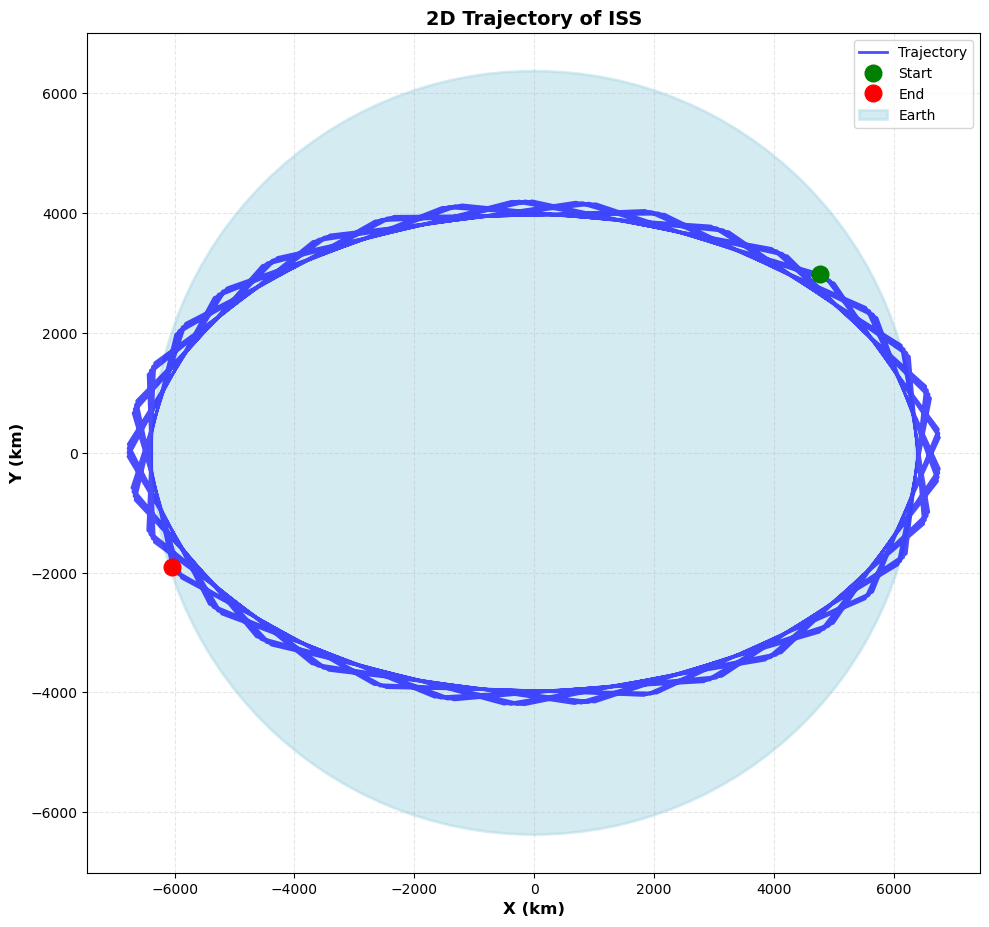


2D trajectory plot displayed above.


In [9]:
# Create trajectory plots
if satellites:
    iss = satellites[0]
    
    # Create a TrajectoryPlotter object (composition relationship)
    plotter = TrajectoryPlotter(iss)
    
    # Generate time points for plotting (using list comprehension - Part 2 requirement)
    # 24 hours with 10-minute intervals
    time_points = [i * 600 for i in range(144)]  # 144 = 24 hours * 60 min / 10 min
    
    print(f"Plotting trajectory for {iss.name}")
    print(f"Time points: {len(time_points)}")
    
    # 2D plot
    fig1 = plotter.plot_2d_trajectory(time_points, show_earth=True)
    plt.tight_layout()
    plt.show()
    
    print("\n2D trajectory plot displayed above.")


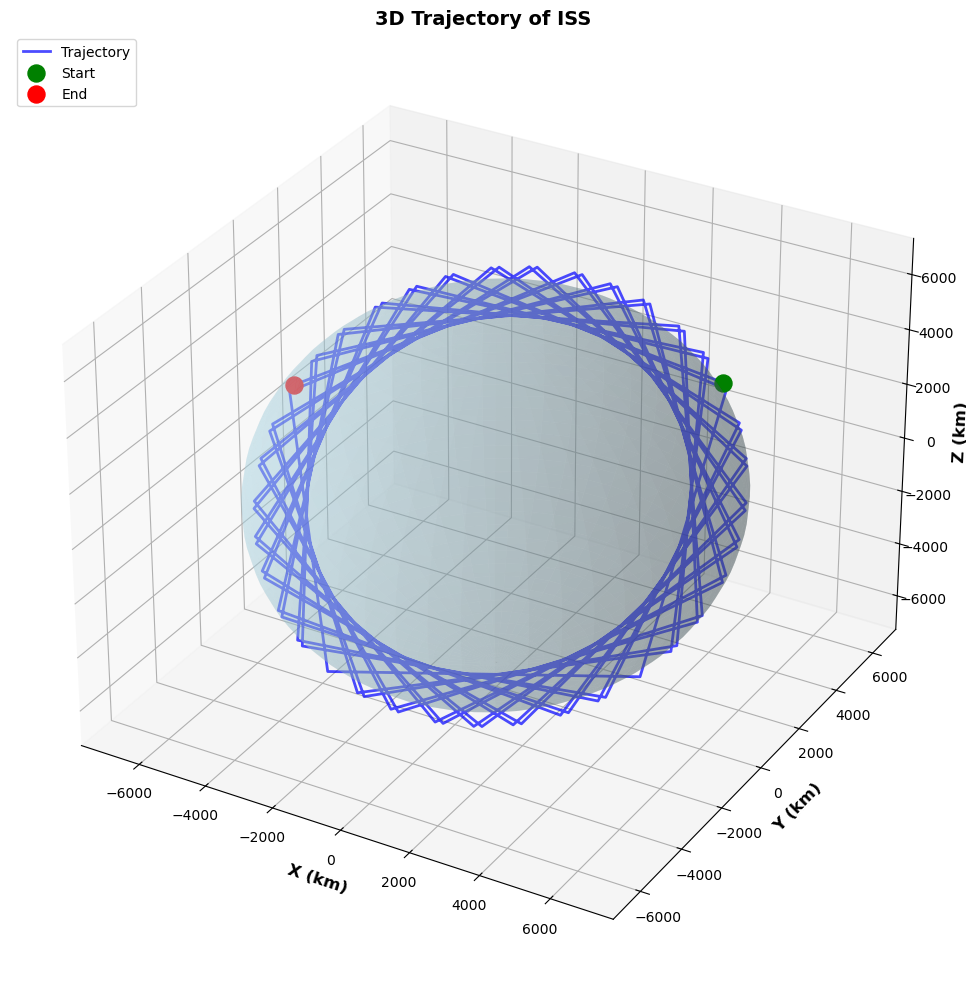

3D trajectory plot displayed above.


In [10]:
# 3D trajectory plot
if satellites:
    iss = satellites[0]
    plotter = TrajectoryPlotter(iss)
    
    # Use fewer points for 3D plot for better performance
    time_points_3d = [i * 600 for i in range(0, 144, 2)]  # Every 20 minutes
    
    fig2 = plotter.plot_3d_trajectory(time_points_3d)
    plt.tight_layout()
    plt.show()
    
    print("3D trajectory plot displayed above.")


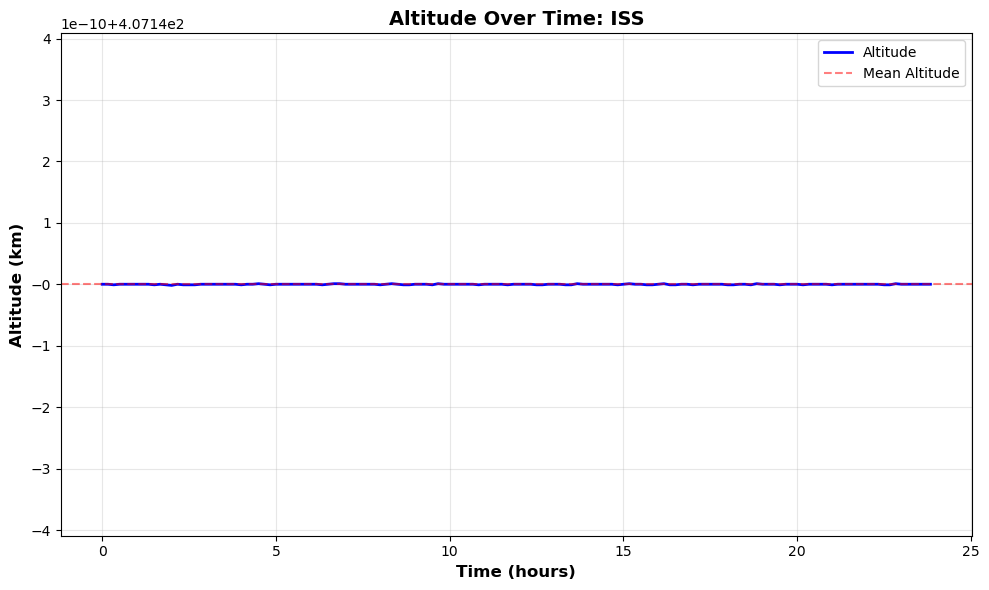

Altitude over time plot displayed above.


In [11]:
# Altitude over time plot
if satellites:
    iss = satellites[0]
    plotter = TrajectoryPlotter(iss)
    
    time_points_alt = [i * 600 for i in range(144)]
    
    fig3 = plotter.plot_altitude_over_time(time_points_alt)
    plt.tight_layout()
    plt.show()
    
    print("Altitude over time plot displayed above.")


## Step 9: Demonstrate Built-in Modules

Using built-in Python modules (csv, datetime, sys, os, json).


In [12]:
# Demonstrate built-in modules usage
import csv
import json
from datetime import datetime, timedelta

print("Built-in modules demonstration:")
print()

# Using datetime module
now = datetime.now()
epoch = datetime(2024, 1, 1, 0, 0, 0)
time_diff = now - epoch
print(f"Current time: {now}")
print(f"Days since epoch: {time_diff.days}")
print()

# Using os module
print(f"Current working directory: {os.getcwd()}")
print(f"Platform: {os.name}")
print()

# Using sys module
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
print()

# Using json module
sample_data = {
    "satellite_name": "ISS",
    "altitude": 408.0,
    "velocity": 7.66
}
json_string = json.dumps(sample_data, indent=2)
print("JSON representation:")
print(json_string)


Built-in modules demonstration:

Current time: 2025-12-13 13:43:02.110080
Days since epoch: 712

Current working directory: /Users/RashikaSN/Rashika/01 Education/01 Education/03 Stevens/02 Courses/01 Sem 4 - Fall 2025/AAI 551 C Python/Project/Python Project Cursor/satellite_trajectory_predictor
Platform: posix

Python executable: /opt/anaconda3/bin/python
Python version: 3.13.5

JSON representation:
{
  "satellite_name": "ISS",
  "altitude": 408.0,
  "velocity": 7.66
}


## Step 10: Using __str__ Method

Demonstrating the __str__ method implementation in both classes.


In [13]:
# Demonstrate __str__ method (Part 2 requirement)
if satellites:
    print("Satellite __str__ method output:")
    for sat in satellites:
        print(f"  {str(sat)}")
    
    print("\n" + "="*60)
    
    # TrajectoryPlotter __str__ method
    plotter = TrajectoryPlotter(satellites[0])
    print("TrajectoryPlotter __str__ method output:")
    print(f"  {str(plotter)}")


Satellite __str__ method output:
  Satellite(name='ISS', id='25544', inclination=51.64°, eccentricity=0.000165, altitude=407.14 km)
  Satellite(name='Hubble Space Telescope', id='20580', inclination=28.47°, eccentricity=0.000306, altitude=563.86 km)
  Satellite(name='GPS-IIIA-3', id='46358', inclination=55.00°, eccentricity=0.001000, altitude=20190.75 km)
  Satellite(name='Starlink-1007', id='44238', inclination=53.00°, eccentricity=0.000100, altitude=557.50 km)
  Satellite(name='Tiangong Space Station', id='48274', inclination=41.50°, eccentricity=0.000800, altitude=427.32 km)

TrajectoryPlotter __str__ method output:
  TrajectoryPlotter(satellite='ISS')


## Step 11: Exception Handling Examples

Demonstrating exception handling with try-except blocks.


In [14]:
# Exception handling demonstration (Part 1 requirement)
print("Exception handling examples:\n")

# Example 1: FileNotFoundError
print("1. Handling FileNotFoundError:")
try:
    read_satellite_data_from_file('nonexistent_file.csv')
except FileNotFoundError as e:
    print(f"   Caught FileNotFoundError: {e}")

print()

# Example 2: ValueError
print("2. Handling ValueError (invalid satellite parameters):")
try:
    invalid_sat = Satellite(
        name="Invalid",
        satellite_id="123",
        inclination=51.6,
        eccentricity=1.5,  # Invalid: eccentricity > 1
        semi_major_axis=6778.0,
        mean_anomaly=0.0,
        epoch=datetime(2024, 1, 1, 0, 0, 0)
    )
except ValueError as e:
    print(f"   Caught ValueError: {e}")

print()

# Example 3: TypeError
print("3. Handling TypeError (wrong type for TrajectoryPlotter):")
try:
    invalid_plotter = TrajectoryPlotter("not a satellite")
except TypeError as e:
    print(f"   Caught TypeError: {e}")

print("\nAll exceptions handled gracefully!")


Exception handling examples:

1. Handling FileNotFoundError:
   Caught FileNotFoundError: File 'nonexistent_file.csv' not found. Please check the file path.

2. Handling ValueError (invalid satellite parameters):
   Caught ValueError: Eccentricity must be a number between 0 and 1

3. Handling TypeError (wrong type for TrajectoryPlotter):
   Caught TypeError: satellite must be a Satellite instance

All exceptions handled gracefully!


## Step 12: Summary and Output

Generate summary and save results.


In [15]:
# Final summary
if satellites:
    print("="*60)
    print("PROJECT SUMMARY")
    print("="*60)
    print(f"\nTotal satellites processed: {len(satellites)}")
    print("\nSatellite Details:")
    
    for i, sat in enumerate(satellites, 1):
        period = calculate_orbital_period(sat)
        velocity = calculate_velocity(sat)
        print(f"\n{i}. {sat.name}")
        print(f"   ID: {sat.satellite_id}")
        print(f"   Altitude: {sat.get_altitude():.2f} km")
        print(f"   Inclination: {sat.inclination:.2f}°")
        print(f"   Orbital Period: {period/60:.2f} minutes")
        print(f"   Velocity: {velocity:.2f} km/s")
    
    print("\n" + "="*60)
    print("All calculations completed successfully!")
    print("="*60)
    
    # Save summary to file
    try:
        output_file = 'data/satellite_summary.csv'
        write_satellite_summary_to_file(output_file, satellites)
        print(f"\nSummary saved to: {output_file}")
    except Exception as e:
        print(f"\nWarning: Could not save summary: {e}")


PROJECT SUMMARY

Total satellites processed: 5

Satellite Details:

1. ISS
   ID: 25544
   Altitude: 407.14 km
   Inclination: 51.64°
   Orbital Period: 92.56 minutes
   Velocity: 7.67 km/s

2. Hubble Space Telescope
   ID: 20580
   Altitude: 563.86 km
   Inclination: 28.47°
   Orbital Period: 95.79 minutes
   Velocity: 7.58 km/s

3. GPS-IIIA-3
   ID: 46358
   Altitude: 20190.75 km
   Inclination: 55.00°
   Orbital Period: 718.03 minutes
   Velocity: 3.87 km/s

4. Starlink-1007
   ID: 44238
   Altitude: 557.50 km
   Inclination: 53.00°
   Orbital Period: 95.66 minutes
   Velocity: 7.58 km/s

5. Tiangong Space Station
   ID: 48274
   Altitude: 427.32 km
   Inclination: 41.50°
   Orbital Period: 92.97 minutes
   Velocity: 7.66 km/s

All calculations completed successfully!
Results successfully written to 'data/satellite_summary.csv'

Summary saved to: data/satellite_summary.csv


In [16]:
# Demonstrate __name__ == "__main__" pattern (Part 2 requirement)
if __name__ == "__main__":
    print("\n" + "="*60)
    print("Running as main program (__name__ == '__main__')")
    print("="*60)
    print("\nThis notebook can also be run as a standalone script.")
    print("All requirements have been demonstrated:")
    print("  ✓ Two classes with relationship (composition)")
    print("  ✓ Meaningful functions")
    print("  ✓ Advanced libraries (NumPy, Matplotlib)")
    print("  ✓ Exception handling")
    print("  ✓ Data I/O")
    print("  ✓ Control flow (for, while, if)")
    print("  ✓ Special functions (enumerate, map, zip, filter, lambda)")
    print("  ✓ Comprehensions (list, dict, set)")
    print("  ✓ Built-in modules")
    print("  ✓ Mutable and immutable objects")
    print("  ✓ Operator overloading")
    print("  ✓ Generator function")
    print("  ✓ __str__ methods")
    print("  ✓ __name__ == '__main__'")
    print("\nProject completed successfully!")



Running as main program (__name__ == '__main__')

This notebook can also be run as a standalone script.
All requirements have been demonstrated:
  ✓ Two classes with relationship (composition)
  ✓ Meaningful functions
  ✓ Advanced libraries (NumPy, Matplotlib)
  ✓ Exception handling
  ✓ Data I/O
  ✓ Control flow (for, while, if)
  ✓ Special functions (enumerate, map, zip, filter, lambda)
  ✓ Comprehensions (list, dict, set)
  ✓ Built-in modules
  ✓ Mutable and immutable objects
  ✓ Operator overloading
  ✓ Generator function
  ✓ __str__ methods
  ✓ __name__ == '__main__'

Project completed successfully!
